In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [3]:
landslides.shape

(1693, 23)

In [4]:
landslides.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

In [5]:
landslides.dtypes

id                        int64
date                     object
time                     object
continent_code           object
country_name             object
country_code             object
state/province           object
population                int64
city/town                object
distance                float64
location_description     object
latitude                float64
longitude               float64
geolocation              object
hazard_type              object
landslide_type           object
landslide_size           object
trigger                  object
storm_name               object
injuries                float64
fatalities              float64
source_name              object
source_link              object
dtype: object

In [9]:
landslides.date.nunique()

922

In [8]:
landslides.date.unique()

array(['3/2/07', '3/22/07', '4/6/07', '4/14/07', '4/15/07', '4/20/07',
       '4/24/07', '5/21/07', '6/27/07', '7/1/07', '7/4/07', '7/8/07',
       '7/13/07', '7/24/07', '8/9/07', '8/11/07', '8/14/07', '8/17/07',
       '8/18/07', '8/19/07', '8/20/07', '8/21/07', '8/23/07', '9/1/07',
       '9/2/07', '9/3/07', '9/4/07', '9/5/07', '9/6/07', '9/9/07',
       '9/17/07', '9/22/07', '9/28/07', '10/8/07', '10/9/07', '10/11/07',
       '10/12/07', '10/13/07', '10/17/07', '10/24/07', '10/29/07',
       '10/31/07', '11/1/07', '11/4/07', '11/12/07', '11/17/07',
       '11/30/07', '12/8/07', '12/11/07', '12/12/07', '12/16/07',
       '12/19/07', '1/1/08', '1/6/08', '1/7/08', '1/28/08', '2/5/08',
       '2/9/08', '2/28/08', '3/4/08', '3/5/08', '3/9/08', '3/10/08',
       '3/14/08', '3/16/08', '3/24/08', '3/28/08', '4/1/08', '4/8/08',
       '4/11/08', '4/13/08', '4/16/08', '4/20/08', '4/25/08', '4/29/08',
       '5/9/08', '5/12/08', '5/20/08', '5/28/08', '5/29/08', '5/31/08',
       '6/1/08', '6/2

In [6]:
landslides.date.head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [11]:
df_date = landslides.date.str.split("/", expand = True)

In [13]:
df_date.head()

,0,1,2
0,3,2,07
1,3,22,07
2,4,6,07
3,4,14,07
4,4,15,07


In [12]:
df_date.columns

RangeIndex(start=0, stop=3, step=1)

In [14]:
df_date[0].nunique()

12

In [17]:
df_date[0].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', nan],
      dtype=object)

In [15]:
df_date[1].nunique()

31

In [18]:
df_date[1].unique()

array(['2', '22', '6', '14', '15', '20', '24', '21', '27', '1', '4', '8',
       '13', '9', '11', '17', '18', '19', '23', '3', '5', '28', '12',
       '29', '31', '30', '16', '7', '10', '25', '26', nan], dtype=object)

In [23]:
li = list(df_date[2].unique())

In [25]:
li[0]

'07'

In [27]:
li

['07', '08', '09', '10', '11', '12', '13', '14', '15', nan, '16']

In [26]:
type(li[0])

str

In [28]:
df_date[2].unique()

array(['07', '08', '09', '10', '11', '12', '13', '14', '15', nan, '16'],
      dtype=object)

In [16]:
df_date[2].nunique()

10

In [ ]:
3/2/07

In [31]:
landslides.date = pd.to_datetime(landslides.date, format = "%m/%d/%y")

In [32]:
landslides.date.dtype

dtype('<M8[ns]')

In [33]:
landslides.dtypes

id                               int64
date                    datetime64[ns]
time                            object
continent_code                  object
country_name                    object
country_code                    object
state/province                  object
population                       int64
city/town                       object
distance                       float64
location_description            object
latitude                       float64
longitude                      float64
geolocation                     object
hazard_type                     object
landslide_type                  object
landslide_size                  object
trigger                         object
storm_name                      object
injuries                       float64
fatalities                     float64
source_name                     object
source_link                     object
dtype: object

In [34]:
landslides.date.describe()

C:\Users\Md Rana Mahmud\AppData\Local\Temp\ipykernel_324\74272118.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  landslides.date.describe()


count                    1690
unique                    922
top       2013-09-12 00:00:00
freq                       21
first     2007-03-02 00:00:00
last      2016-03-02 00:00:00
Name: date, dtype: object

In [42]:
landslides.shape

(1693, 23)

In [41]:
landslides.sort_values('date', ascending = False)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
1692,7541,2016-03-02,8:00,NaN,United States,US,Vermont,2066,Windsor,1.78429,...,"(43.4771, -72.406599999999997)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Valley News,http://www.vnews.com/home/21353539-95/loose-ledge
1683,7530,2016-02-27,15:30,NaN,United States,US,Idaho,485,Idaho City,24.16064,...,"(44.103999999999999, -116.0033)",Landslide,Rockfall,Small,Rain,NaN,1.0,0.0,KTVB,http://www.ktvb.com/news/local/itd-working-to-...
1686,7533,2016-02-27,12:15,NaN,United States,US,West Virginia,2184,Bluewell,5.07093,...,"(37.328699999999998, -81.313400000000001)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-blocks...
1682,7529,2016-02-27,NaN,NaN,United States,US,Idaho,939,Cascade,22.78728,...,"(44.3127, -116.07599999999999)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,KTVB,http://www.ktvb.com/news/local/itd-working-to-...
1691,7540,2016-02-26,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,42,2007-03-22,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
0,34,2007-03-02,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1482,7042,NaT,Morning,NaN,United States,US,Kansas,857,Oregon,14.54524,...,"(39.989199999999997, -95.315299999999993)",Landslide,Mudslide,Small,Downpour,NaN,0.0,0.0,KSNT,http://ksnt.com/2015/05/26/update-flooded-road...
1497,7080,NaT,13:00,NaN,United States,US,Ohio,4113,Chagrin Falls,0.71363,...,"(41.431199999999997, -81.391999999999996)",Landslide,Landslide,Small,Unknown,NaN,0.0,0.0,Cleveland,http://www.cleveland.com/chagrin-falls/index.s...


In [36]:
landslides.date

0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: date, Length: 1693, dtype: datetime64[ns]

In [35]:
landslides.date.dt.year

0       2007.0
1       2007.0
2       2007.0
3       2007.0
4       2007.0
         ...  
1688    2015.0
1689    2016.0
1690    2016.0
1691    2016.0
1692    2016.0
Name: date, Length: 1693, dtype: float64

In [43]:
landslides['month'] = landslides.date.dt.month

In [55]:
landslides.groupby('month')['distance'].min()

month
1.0     0.03251
2.0     0.27505
3.0     0.00003
4.0     0.00442
5.0     0.00435
6.0     0.10261
7.0     0.00178
8.0     0.00359
9.0     0.00273
10.0    0.08269
11.0    0.11421
12.0    0.09491
Name: distance, dtype: float64

In [57]:
landslides.groupby('month')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1.0,65.0,8.020350,9.408146,0.03251,1.636250,4.203870,12.958870,44.08725
2.0,58.0,9.011861,9.731647,0.27505,2.049882,5.825035,11.983690,50.21741
3.0,150.0,6.030639,5.585962,0.00003,1.739605,3.808785,9.180005,23.26062
4.0,167.0,5.455916,5.792012,0.00442,1.745485,3.552820,7.521080,46.77007
5.0,203.0,7.599642,8.459344,0.00435,1.897000,5.139130,10.383440,61.75306
6.0,132.0,9.846973,11.693913,0.10261,2.149878,5.411290,12.929378,74.46097
7.0,210.0,8.879942,10.441849,0.00178,2.223955,5.379700,11.078155,66.07162
8.0,145.0,10.213350,13.067031,0.00359,2.550230,5.126670,12.934430,72.64680
9.0,203.0,8.620497,10.827961,0.00273,1.721590,3.648180,10.474110,54.90196


In [56]:
landslides.groupby('month')['distance'].max()

month
1.0     44.08725
2.0     50.21741
3.0     23.26062
4.0     46.77007
5.0     61.75306
6.0     74.46097
7.0     66.07162
8.0     72.64680
9.0     54.90196
10.0    70.82902
11.0    25.51411
12.0    41.54001
Name: distance, dtype: float64

In [54]:
landslides.groupby('month')['distance'].std()

month
1.0      9.408146
2.0      9.731647
3.0      5.585962
4.0      5.792012
5.0      8.459344
6.0     11.693913
7.0     10.441849
8.0     13.067031
9.0     10.827961
10.0     8.709979
11.0     4.962714
12.0     7.919730
Name: distance, dtype: float64

In [47]:
landslides.groupby('month')['distance'].mean()

month
1.0      8.020350
2.0      9.011861
3.0      6.030639
4.0      5.455916
5.0      7.599642
6.0      9.846973
7.0      8.879942
8.0     10.213350
9.0      8.620497
10.0     7.047630
11.0     5.785593
12.0     7.472365
Name: distance, dtype: float64

In [52]:
dfavg = landslides.groupby([ 'country_code','month'])['distance'].mean().reset_index()

In [53]:
dfavg

,country_code,month,distance
0,BB,10.0,2.87363
1,BM,2.0,0.89751
2,BM,9.0,1.54715
3,BR,1.0,1.04062
4,BR,3.0,0.17020
...,...,...,...
178,VE,9.0,6.65506
179,VE,11.0,5.50863
180,VE,12.0,2.55507
181,VI,5.0,2.79535


In [44]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,month
0,34,2007-03-02,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,3.0
1,42,2007-03-22,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,3.0
2,56,2007-04-06,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,4.0
3,59,2007-04-14,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,4.0
4,61,2007-04-15,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,4.0


In [37]:
landslides.date.dt.month

0        3.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
1688    12.0
1689     2.0
1690     2.0
1691     2.0
1692     3.0
Name: date, Length: 1693, dtype: float64

In [38]:
landslides.date.dt.day

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date, Length: 1693, dtype: float64

In [39]:
landslides.date.dt.quarter

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1688    4.0
1689    1.0
1690    1.0
1691    1.0
1692    1.0
Name: date, Length: 1693, dtype: float64

In [58]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [59]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [60]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [62]:
landslides['date_parsed2'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)

In [65]:
landslides.dtypes

id                               int64
date                            object
time                            object
continent_code                  object
country_name                    object
country_code                    object
state/province                  object
population                       int64
city/town                       object
distance                       float64
location_description            object
latitude                       float64
longitude                      float64
geolocation                     object
hazard_type                     object
landslide_type                  object
landslide_size                  object
trigger                         object
storm_name                      object
injuries                       float64
fatalities                     float64
source_name                     object
source_link                     object
date_parsed             datetime64[ns]
date_parsed2            datetime64[ns]
dtype: object

In [63]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed,date_parsed2
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15,2007-04-15


In [66]:
landslides.date.dt

AttributeError: Can only use .dt accessor with datetimelike values

In [67]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [68]:
day_of_month_landslides.isnull().sum()

3

In [69]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

In [70]:
day_of_month_landslides.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


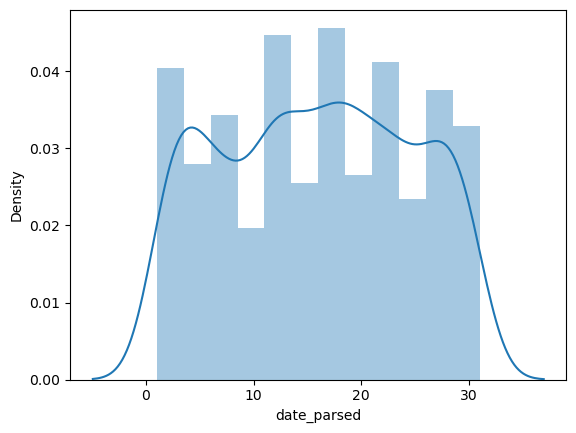

In [74]:
# plot the day of the month
sns.distplot(day_of_month_landslides);

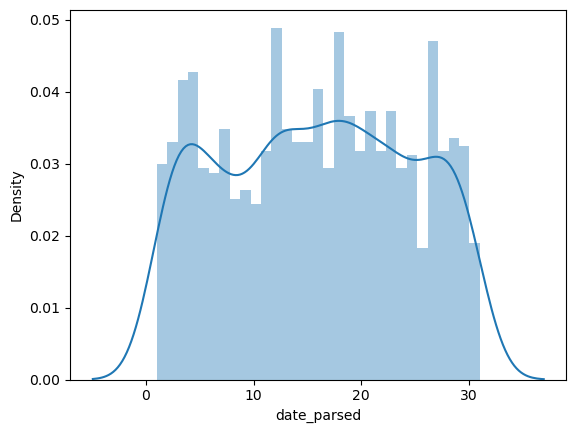

In [73]:
# plot the day of the month
sns.distplot(day_of_month_landslides,  bins=31);

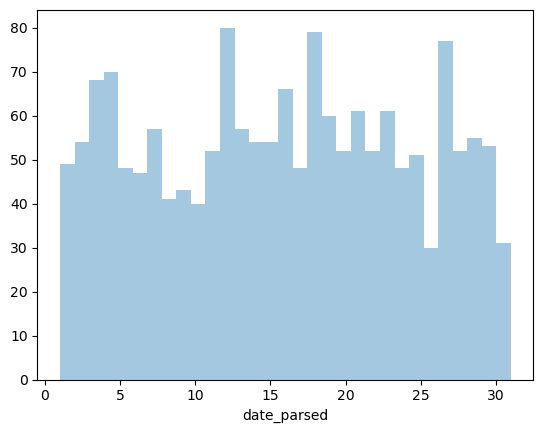

In [72]:
# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31);